This notebook contains code to generate two numpy arrays that you need to use for the Poisson's equation problem.  These arrays, ```single_star_array``` and ```many_star_array```, are in a 3D box that is assumed to be 1 parsec across and the stars are 1 solar mass.  See below for examples of how to make images of slices of the array or a sum of the whole array!

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
Ngrid = 103  # Should be an odd number greater than ~30 or so and 
             # should include 1 ghost zone on each edge.
Nstars = 100 # Number of stars for part 2 of this problem.
Lbox  = 1.0  # Box size in units of parsecs
Mstar = 1.0  # Mass of a single star in solar masses

# "stellar density" - Mstar / V_cell in CGS units
rho_star = Mstar*1.989e33/(Lbox/float(Ngrid-2)*3.0857e+18)**3

# this is the array that has a single star at the center
single_star_array = np.zeros([Ngrid,Ngrid,Ngrid])

# this is the array that has Nstars stars scattered randomly
many_star_array = np.zeros([Ngrid,Ngrid,Ngrid])

# get the center cell using integer division 
cen = Ngrid // 2

# make array with a single star
single_star_array[cen,cen,cen] += rho_star

# set random seed so result is reproducible
np.random.seed(8675309)

# loop over many_star_array and distribute stars 
# randomly, but not too close to the edge.
for i in range(Nstars):
    many_star_array[np.random.randint(10,Ngrid-10),
                    np.random.randint(10,Ngrid-10),
                    np.random.randint(10,Ngrid-10)] += rho_star

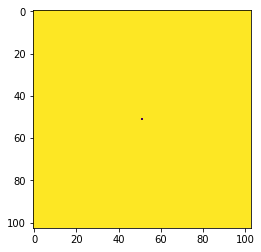

In [3]:
# this is an example of how to make an image of a single slice of a 3D array
# numpy colormaps are at http://matplotlib.org/examples/color/colormaps_reference.html - be creative!
plt.imshow(single_star_array[:,:,cen],cmap='viridis_r')

In [4]:
# this is an example of how to create a "projection" - a sum of array values along an axis.
starproj_single = np.sum(single_star_array,axis=2)
starproj_many = np.sum(many_star_array,axis=2)

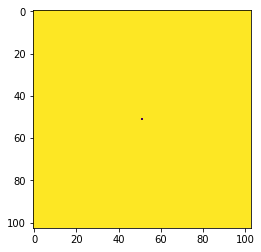

In [5]:
# making an image of the projection of a single star
plt.imshow(starproj_single,cmap='viridis_r')

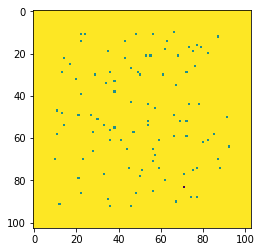

In [6]:
# making an imagine of a projection of many stars
plt.imshow(starproj_many,cmap='viridis_r')